In [48]:
#Import the library file
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score


In [7]:
# Load the data
df = pd.read_csv("clustering.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


## K Means Algorithm
K-means algorithm is an unsupervised learning. It is an iterative algorithm that partitions n datasets into k groups where k must be less than n. K-means is a distance-based algorithm. Each point belongs to one group.Member of a cluster/group have similarities in their features.

The number of clusters K has to be known for us to group our data points into clusters. K-mean is the simplest and commonly used clustering algorithm.

## How it works
    1. Identify the number of groups k needed
    2. Randomly select k points from the data and make them the initial centroids
    3. Assign input data to k that is the nearest centroid (using Euclidean distance or Manhattan distance)
    4. Calculate and Update the centroid with  the mean of all members of a cluster.
    5. Iterate steps 3 and 4 until the cluster centroids are unchangeable.

In [35]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [84]:
#lets take the one feature and analyze k Means
features = ['LoanAmount','ApplicantIncome','Loan_Amount_Term']
df1 = df[['LoanAmount','ApplicantIncome','Loan_Amount_Term']]
#.select("LoanAmount","Dependents","ApplicantIncome","Credit_History","Loan_Amount_Term")
data = df1.copy()
data.fillna(-999,inplace=True)
data=data.values
print(data)

[[ 128. 4583.  360.]
 [  66. 3000.  360.]
 [ 120. 2583.  360.]
 ...
 [  71. 2900.  360.]
 [  40. 4106.  180.]
 [ 133. 4583.  360.]]


In [43]:
# Select the input feature
scaler = StandardScaler()
X=scaler.fit_transform(data)
print(X)

[[ 0.81257519  0.70746877  0.24679745]
 [-1.37659578 -0.40893221  0.24679745]
 [ 0.53010151 -0.70301888  0.24679745]
 ...
 [-1.20004974 -0.47945659  0.24679745]
 [-2.29463522  0.37106746 -0.52152473]
 [ 0.98912123  0.70746877  0.24679745]]


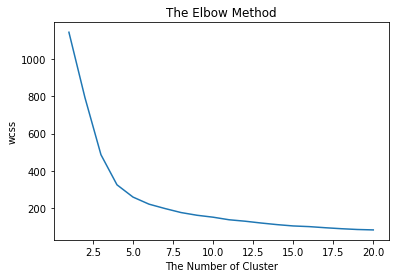

In [44]:
## We need to find the number of cluster from the Elbow method
wcss = []
for i in range(1,21):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,21),wcss)
plt.title('The Elbow Method')
plt.xlabel('The Number of Cluster')
plt.ylabel('wcss')
plt.show()

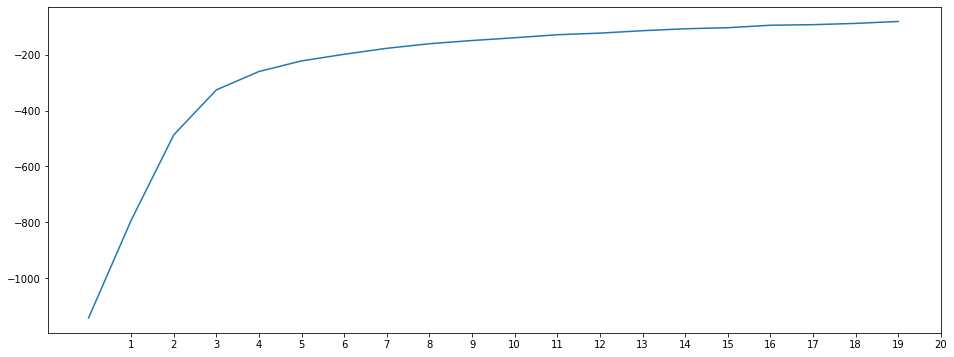

In [55]:
#%%time
n_cluster = range(1,21)
kmeans = [KMeans(n_clusters = i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

f = plt.figure(1, figsize=(16,6))
plt.plot(scores)
_ = plt.xticks(n_cluster)

In [57]:
#Get the best number of cluster based on elbow method
scores=np.array(scores)
dif_scores = scores / scores[0]
dif_scores = np.diff(dif_scores)
n_cluster = np.argwhere(dif_scores < np.quantile(dif_scores, 0.9)) [-1][0]
print(n_cluster)

18


In [64]:
# lets check the first observation
preds = KMeans(n_clusters = n_cluster).fit_predict(data)
print(f"First Observation cluster is :{preds[0]}")

First Observation cluster is :7


In [67]:
df = pd.DataFrame(df)
df["cluster"] = preds

outliers ={
    x 
    for x in zip(
    df["cluster"].value_counts().iloc[-2:].index,
        df["cluster"].value_counts().iloc[-2:].values,
    )
}

In [69]:
df["cluster"].value_counts()

9     49
2     44
13    40
4     39
6     31
7     29
15    26
14    26
12    25
0     20
10    12
17    10
1      9
3      6
16     5
5      4
11     3
8      3
Name: cluster, dtype: int64

In [71]:
# first item in the tuple is the predicteed cluster and the second is the number of observation
outliers

{(8, 3), (11, 3)}

In [79]:
#get only the categories that contain a number of obeservation that in the lower quantile is 10%
clusters ={
    x[0]
    for x in outliers
    if x[1] < np.quantile(df["cluster"].value_counts().values, 0.10)
}

In [80]:
clusters

{8, 11}

In [85]:
for c in clusters:
    print(df[df.cluster == c][features])

     LoanAmount  ApplicantIncome  Loan_Amount_Term
153       112.0             9703             360.0
235       130.0             8750             360.0
275       150.0             8624             360.0
     LoanAmount  ApplicantIncome  Loan_Amount_Term
14        104.0             7660             360.0
99         75.0             9323             180.0
290        84.0             7085             360.0


For n_clusters = 2 The average silhouette_score is : 0.7048211923567378
For n_clusters = 3 The average silhouette_score is : 0.3719352255512877
For n_clusters = 4 The average silhouette_score is : 0.3826608886421489
For n_clusters = 5 The average silhouette_score is : 0.341032595773008
For n_clusters = 6 The average silhouette_score is : 0.33879230056846593
For n_clusters = 7 The average silhouette_score is : 0.32377371307906067
For n_clusters = 8 The average silhouette_score is : 0.3421071677274934
For n_clusters = 9 The average silhouette_score is : 0.33794043849334704
For n_clusters = 10 The average silhouette_score is : 0.32245099878160416
For n_clusters = 11 The average silhouette_score is : 0.32444666497679053
For n_clusters = 12 The average silhouette_score is : 0.3182819242457474
For n_clusters = 13 The average silhouette_score is : 0.304931190597075
For n_clusters = 14 The average silhouette_score is : 0.30815955686958824
For n_clusters = 15 The average silhouette_score is : 0

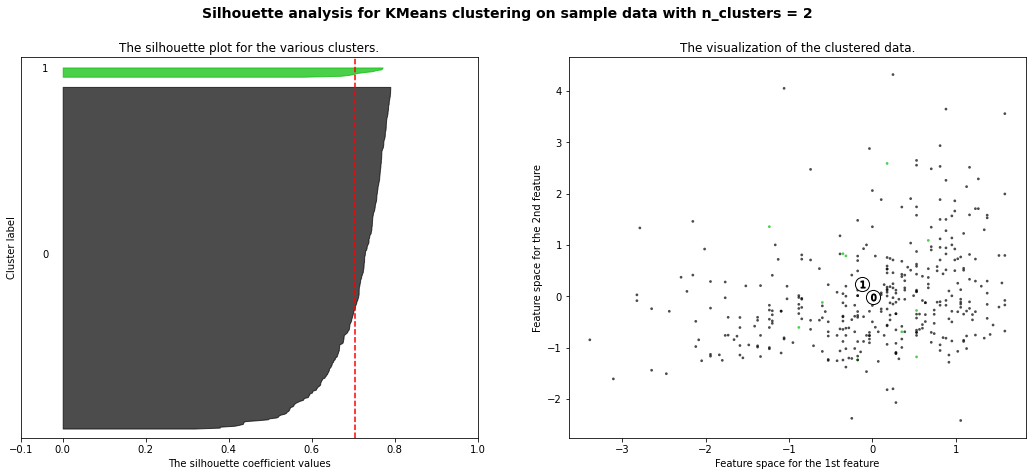

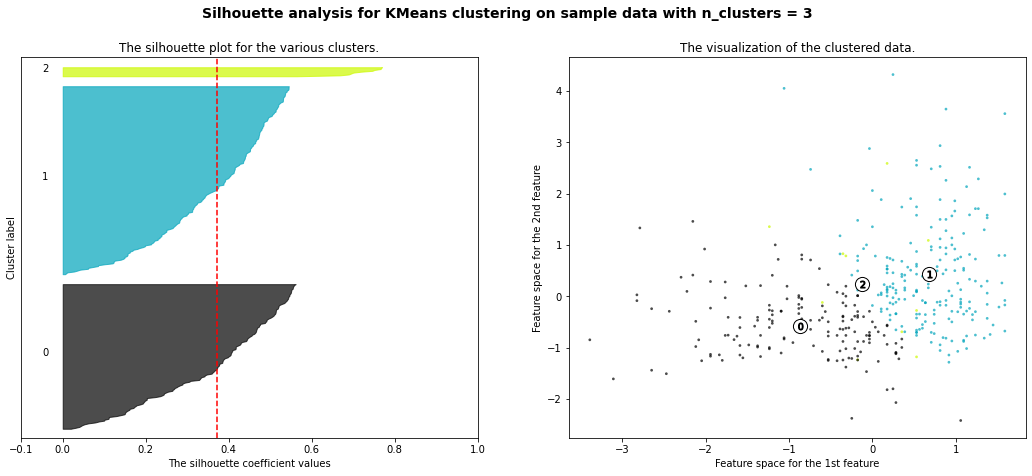

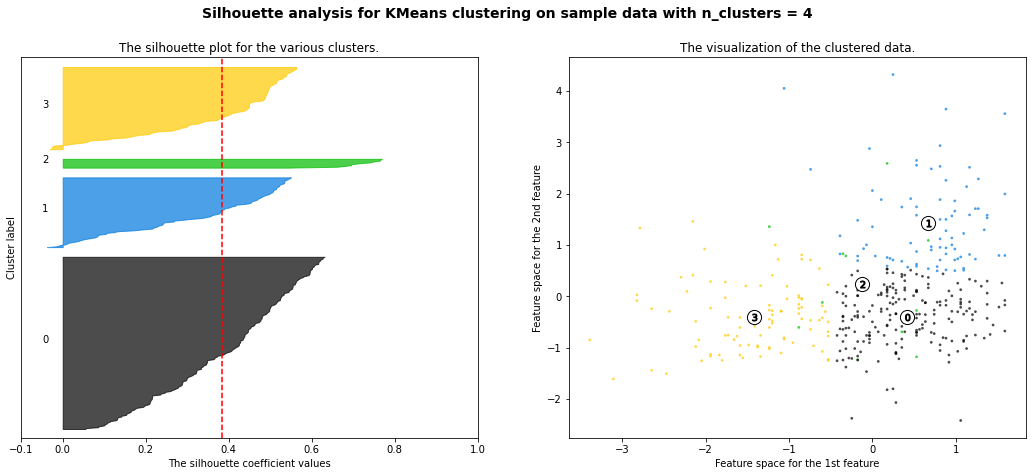

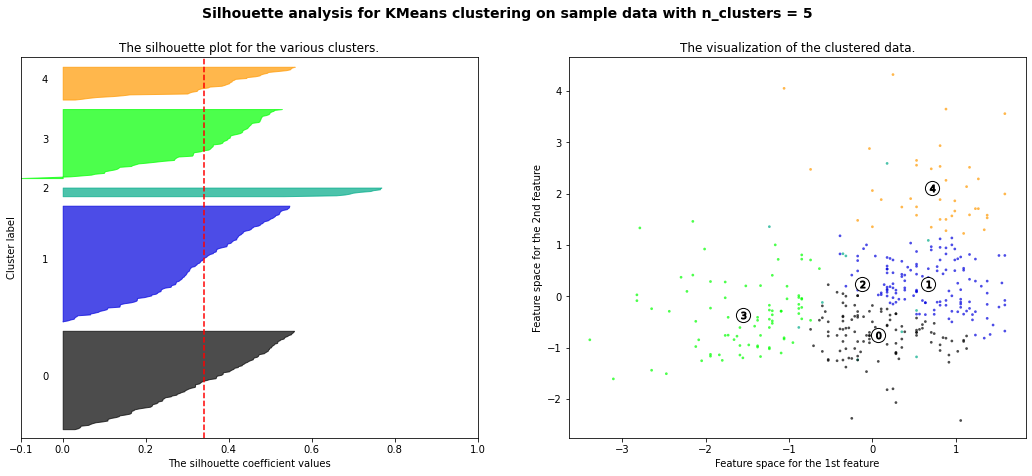

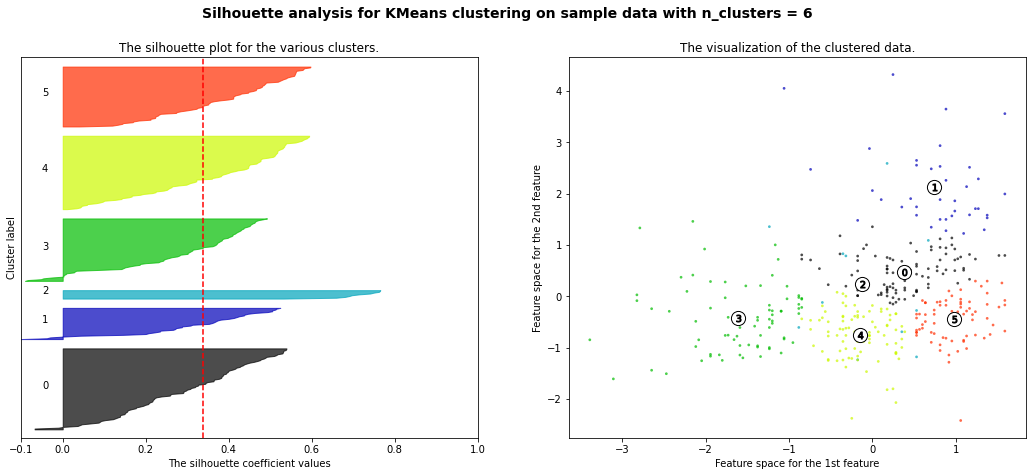

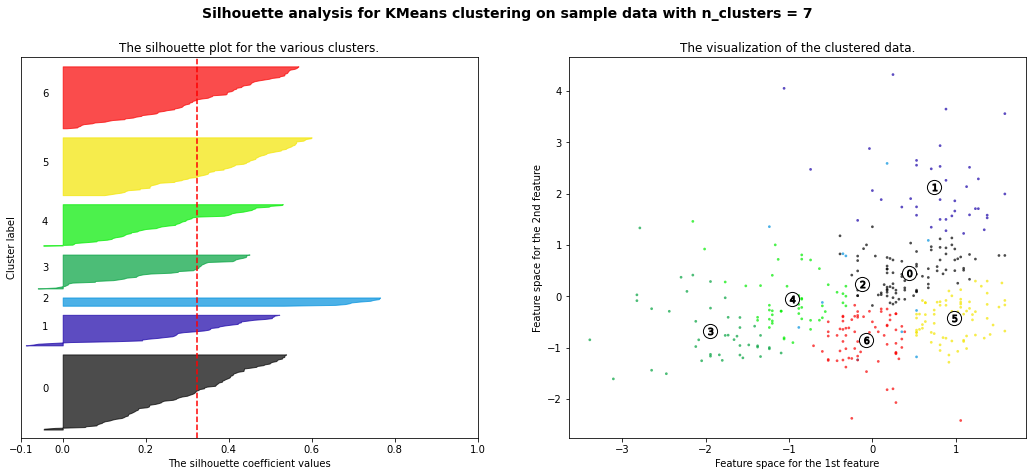

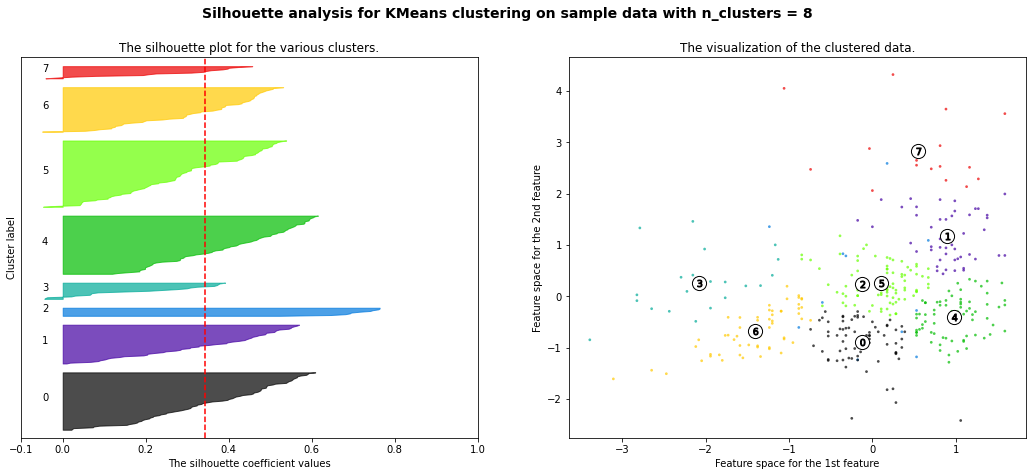

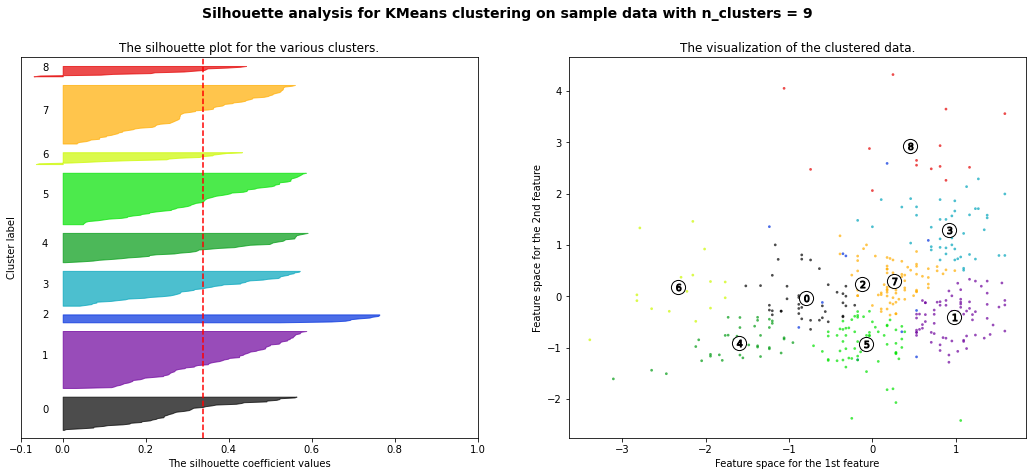

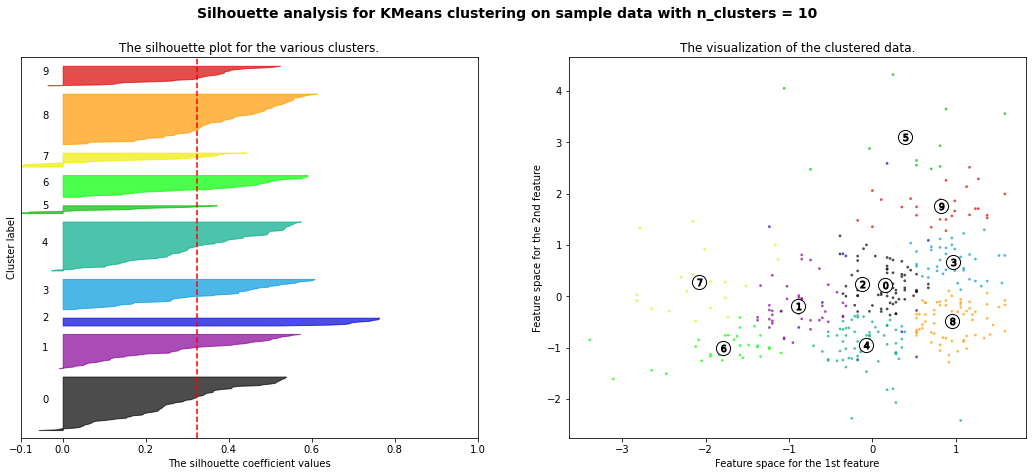

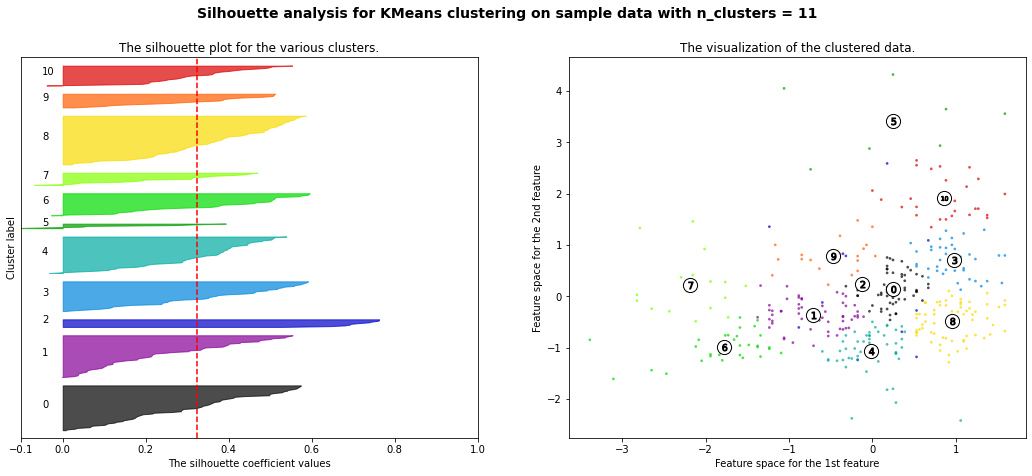

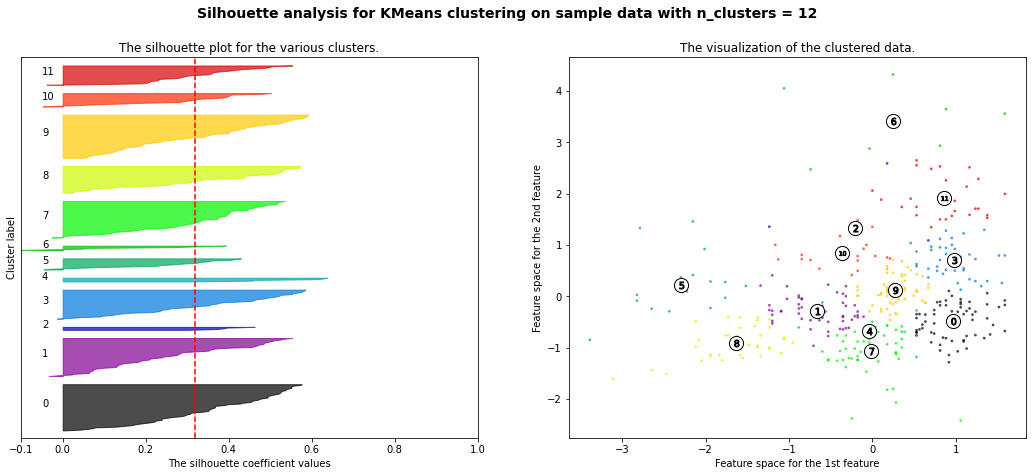

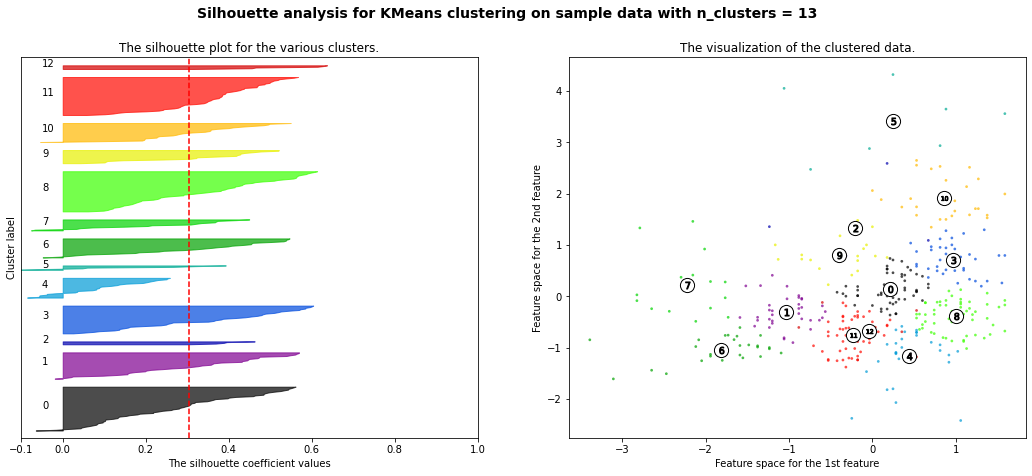

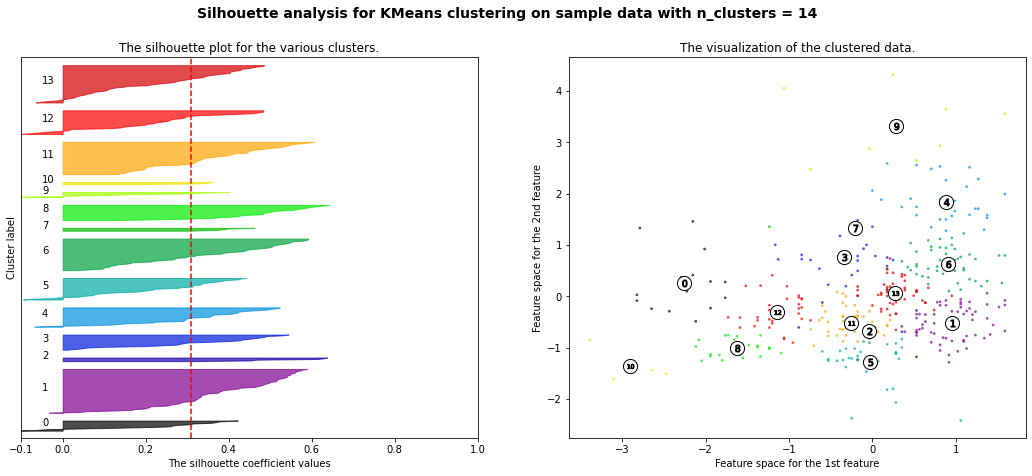

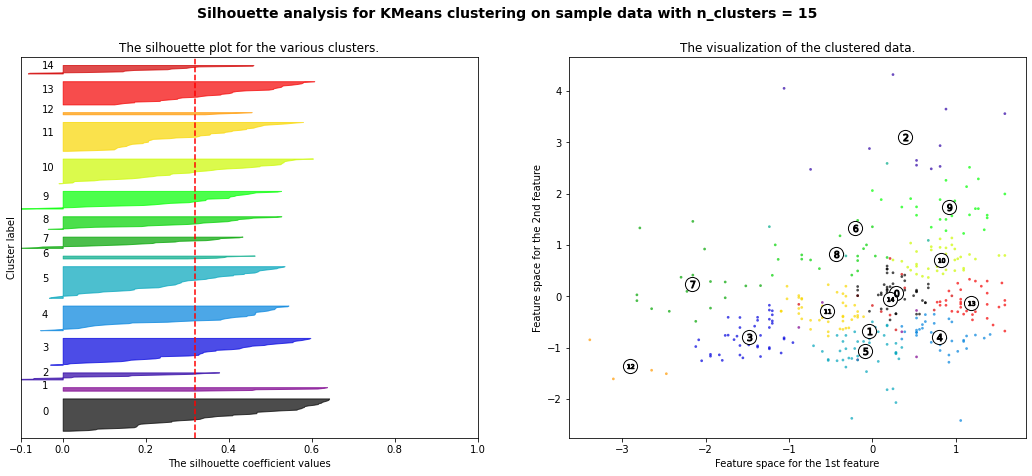

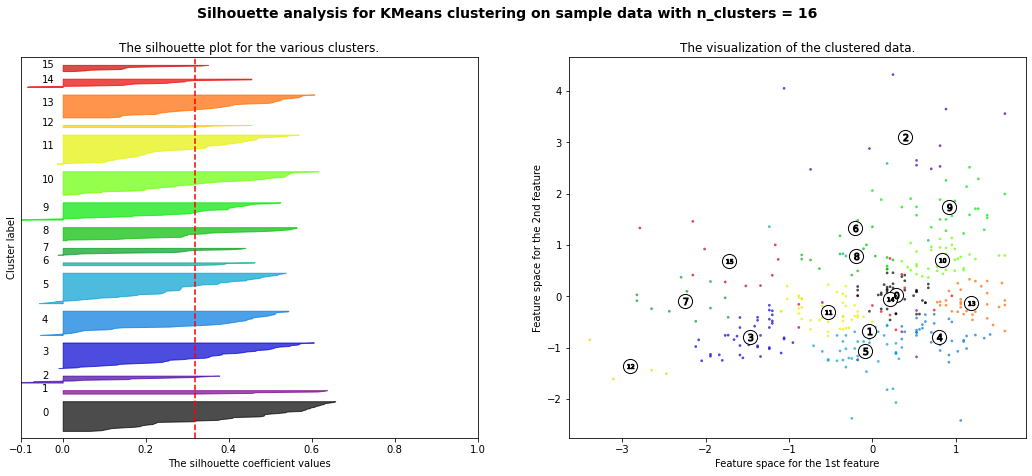

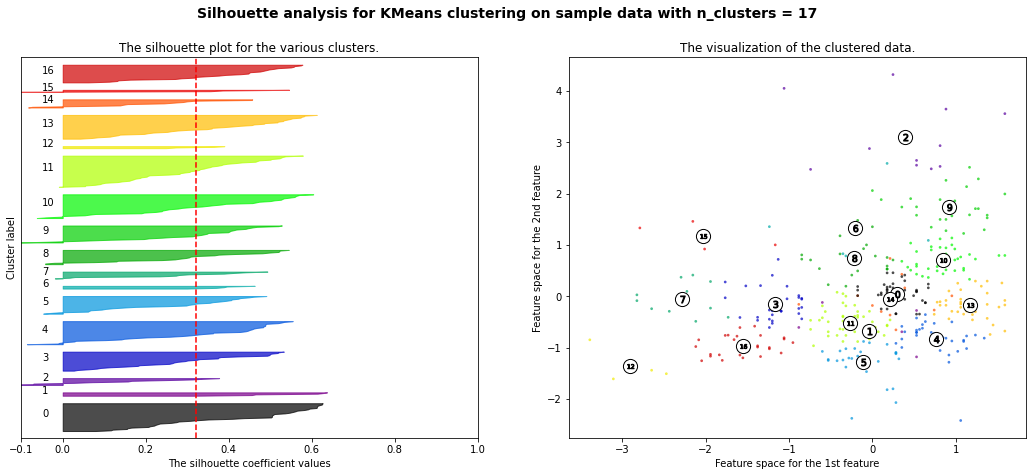

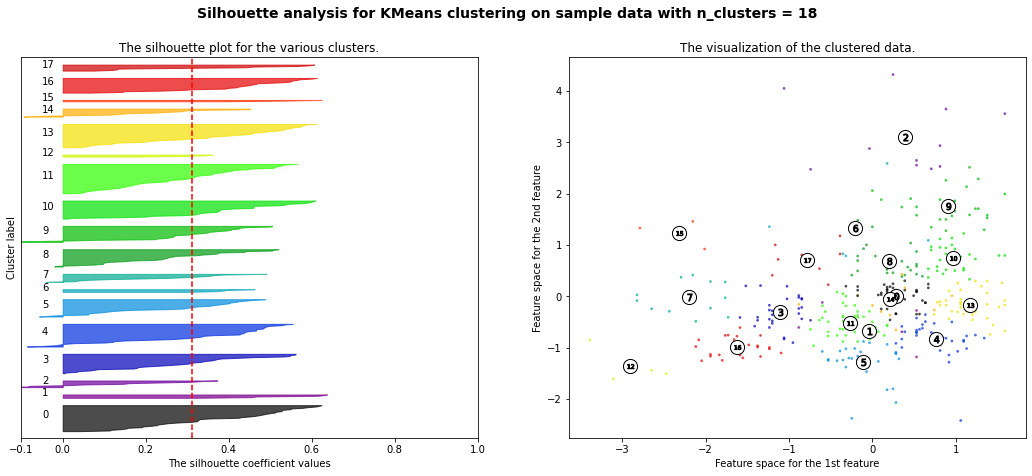

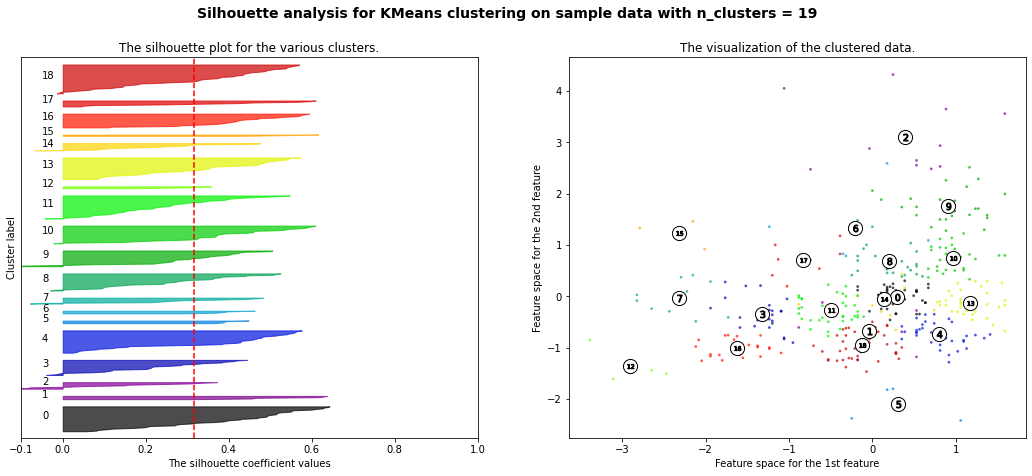

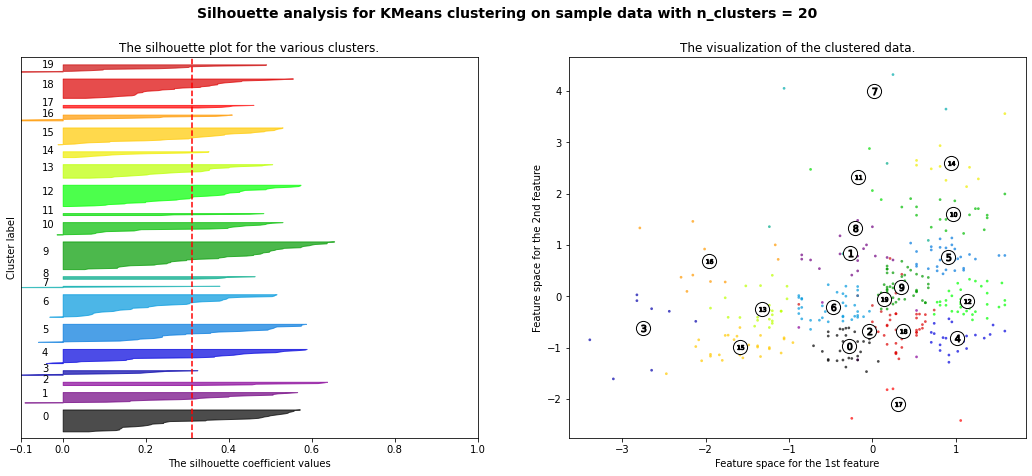

In [49]:
range_n_clusters = range(2,21)
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
from the above we can see that cluster